In [29]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Reading the data:

In [3]:
airlines_df=pd.read_excel("Airlines+Data.xlsx")

In [4]:
airlines_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
# no null values in the data

# Visualize the data :

In [7]:
# Converting Month column as index column

airlines_df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

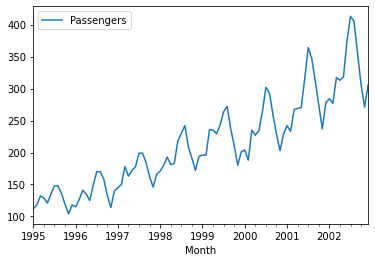

In [8]:
airlines_df.plot()

In [9]:
# This plot has linear trend with multiplicative seasonality

# Splitting the Data:

In [10]:
train=airlines_df.head(84)
test=airlines_df.tail(12) # consider last seasonality for training

# Moving Average:

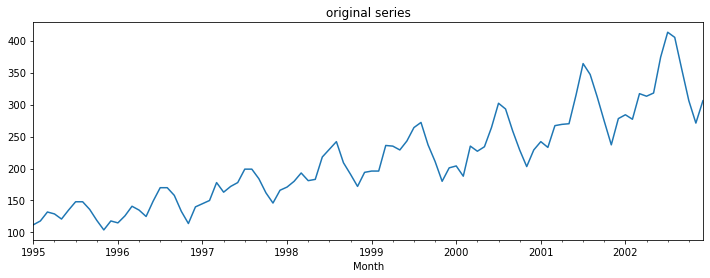

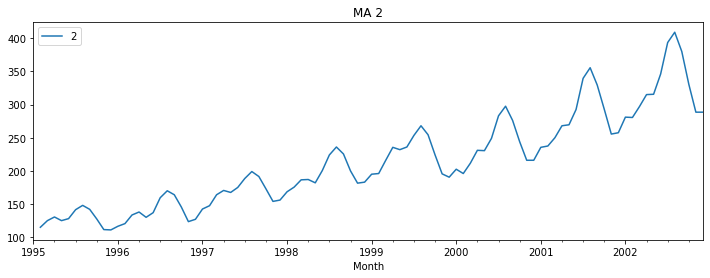

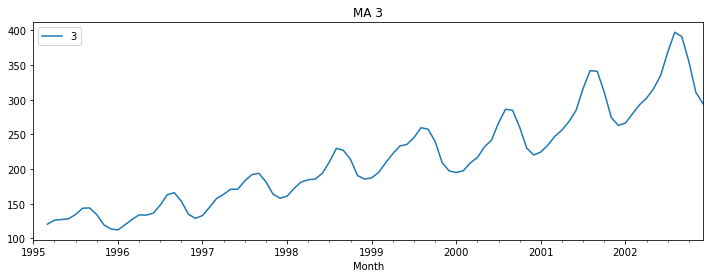

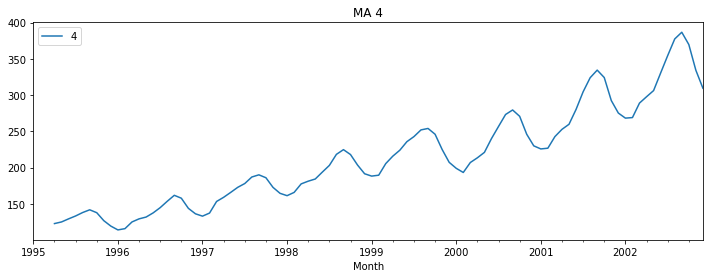

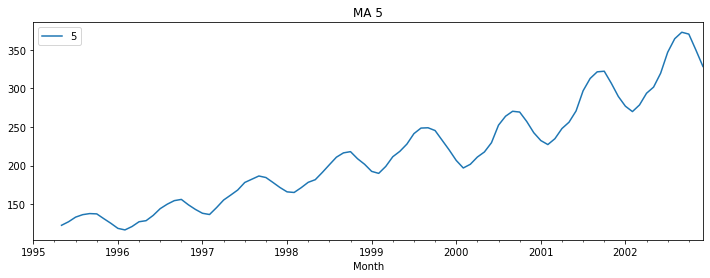

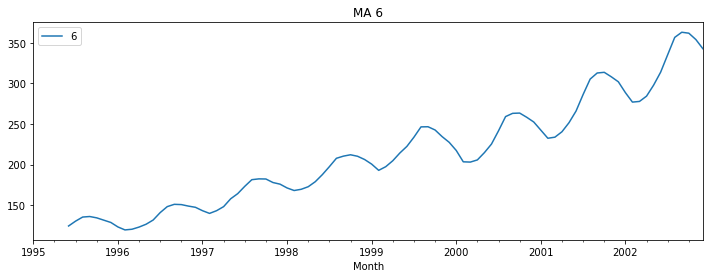

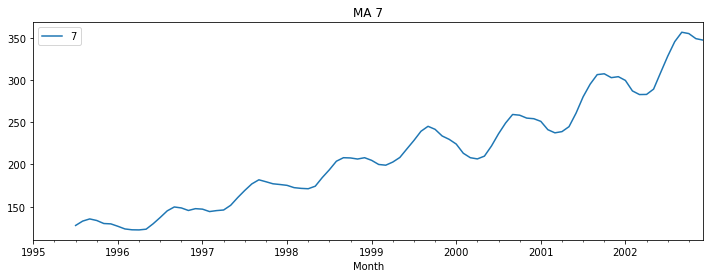

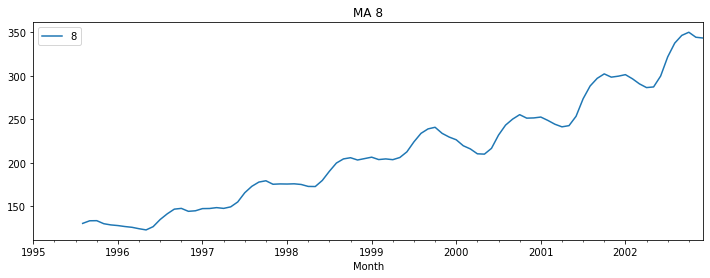

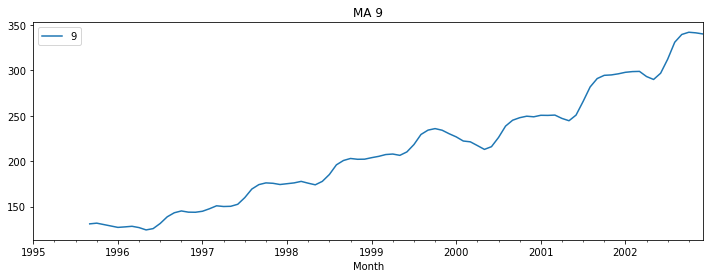

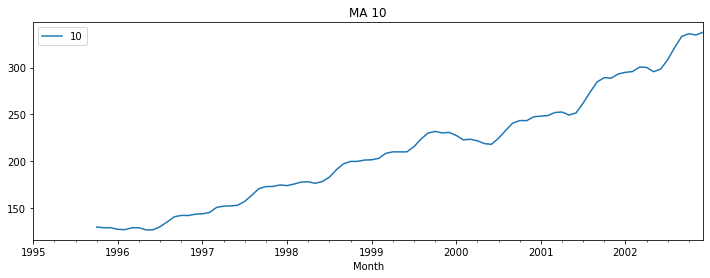

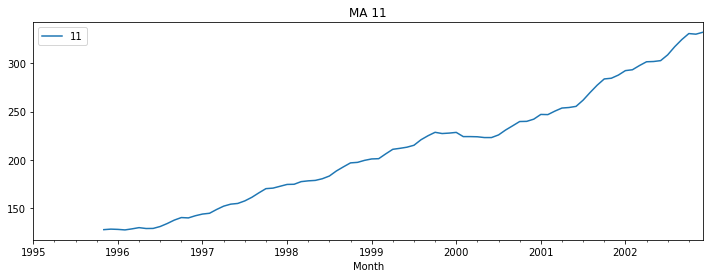

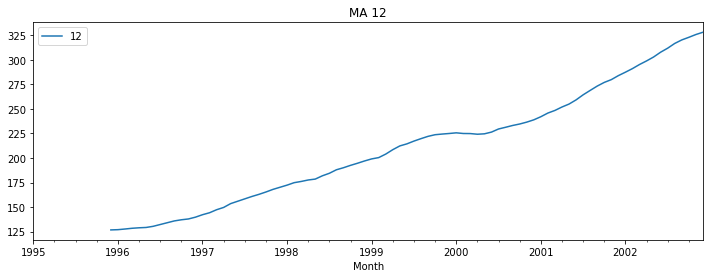

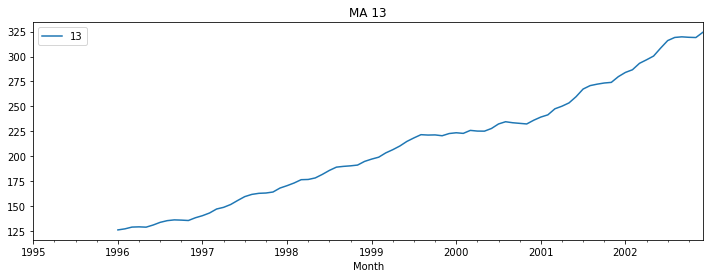

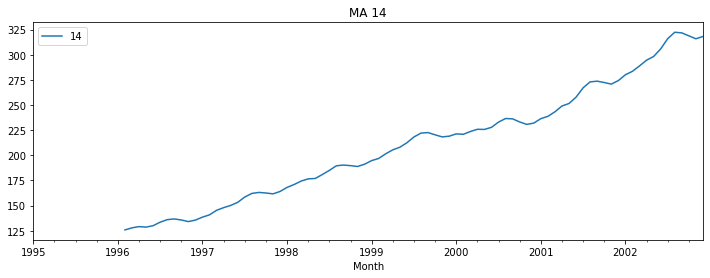

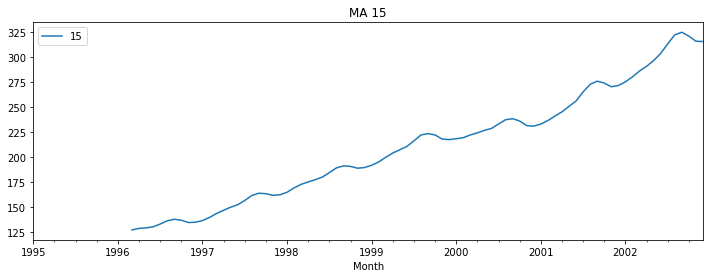

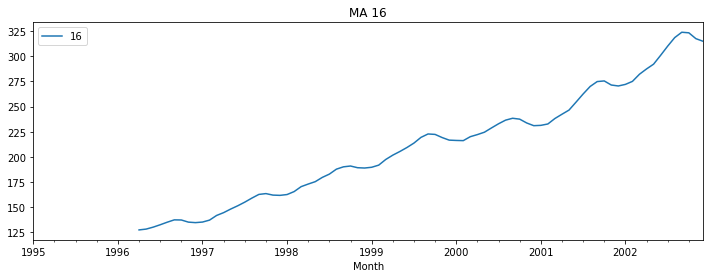

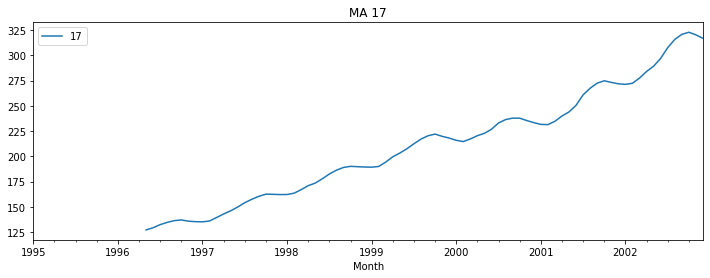

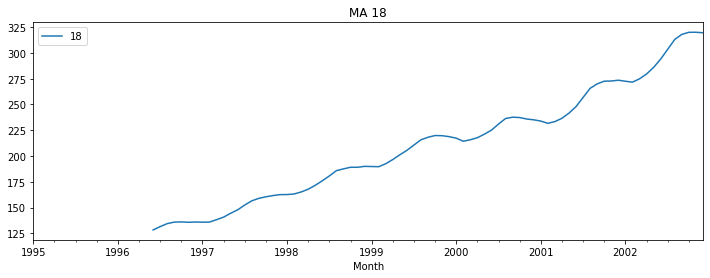

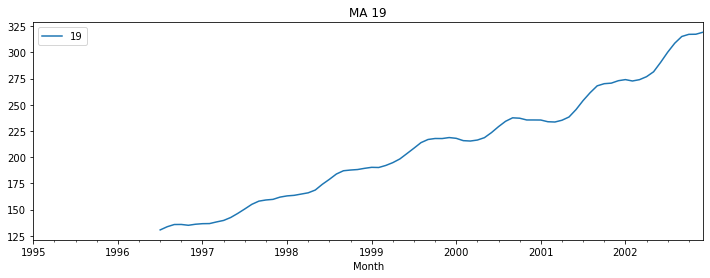

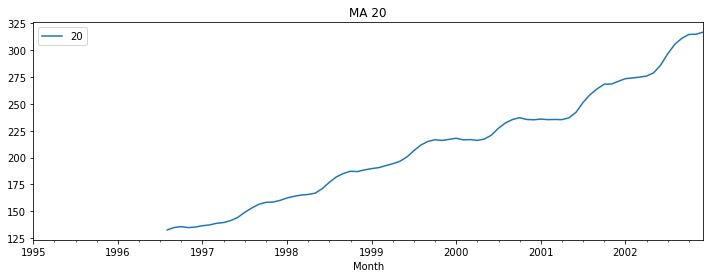

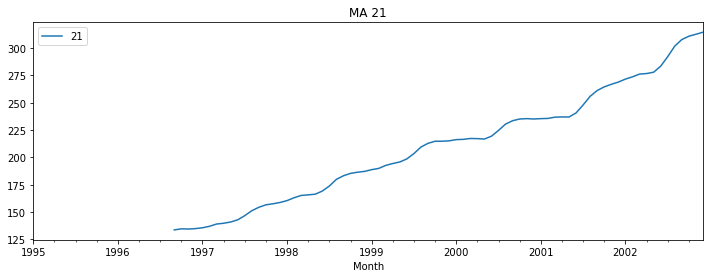

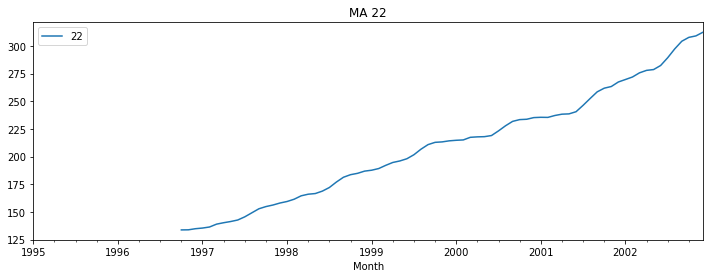

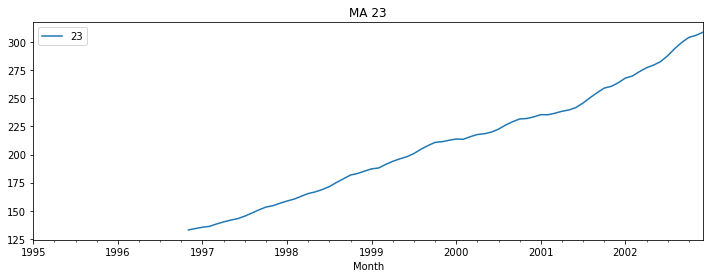

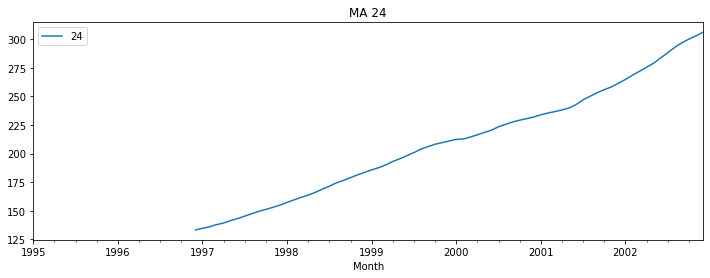

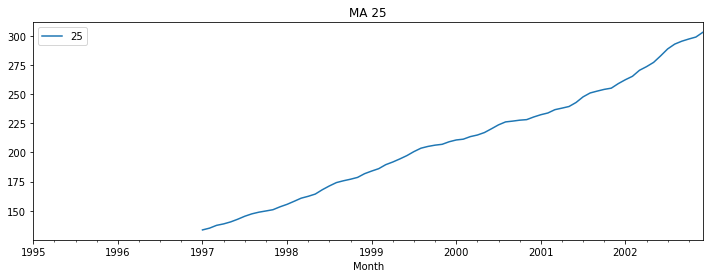

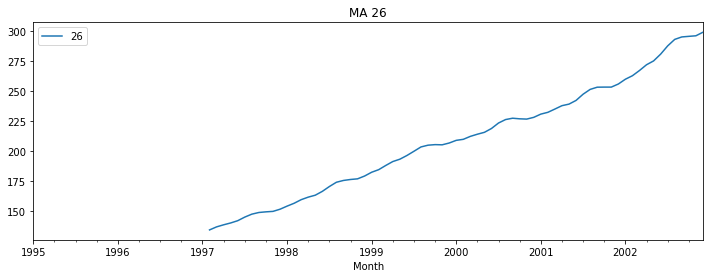

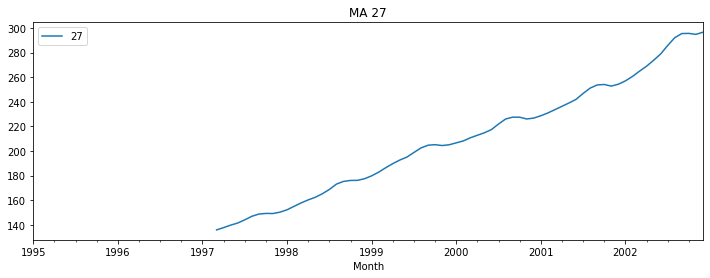

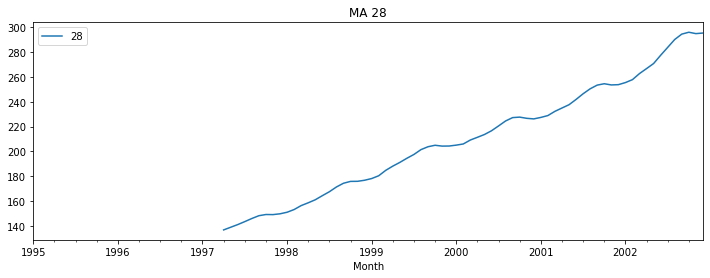

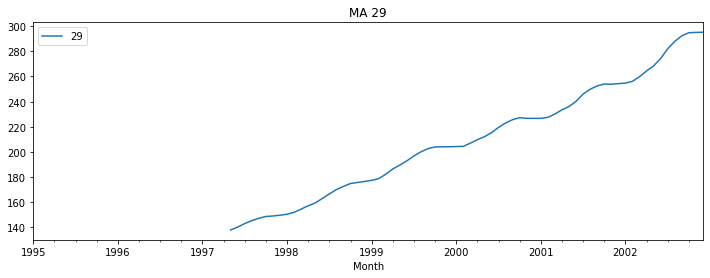

In [11]:
plt.figure(figsize=(12,4))
airlines_df.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,30):
    plt.figure(figsize=(12,4))


    airlines_df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

In [12]:
# For MA = 12 we have a smooth curve formed

# Time Series Decomposition plot :

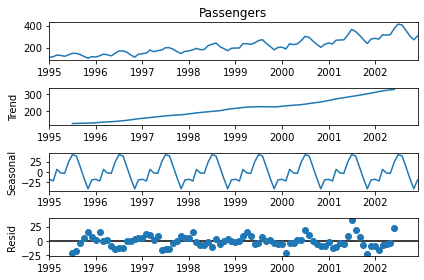

In [13]:
decompose_ts_add = seasonal_decompose(airlines_df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [14]:
# WE found a linear trend and an additive seasonality 

# ACF and PACF Plots:

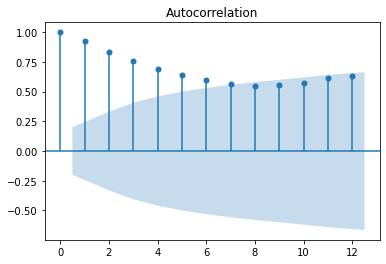

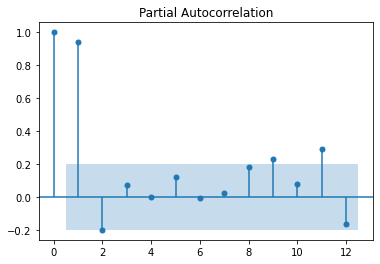

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines_df.Passengers,lags=12)
tsa_plots.plot_pacf(airlines_df.Passengers,lags=12)
plt.show()

# Data driven Models :

In [16]:
# error calculation :

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# 1. Simple Exponential Method:

In [30]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 


13.41127474051367

In [31]:
# Using different smoothing levels :

import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(pred_ses,test.Passengers) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 15.813278836837254
smoothing_level  0.19 --> MAPE Error 13.468422780576319
smoothing_level  0.28 --> MAPE Error 13.503223919739462
smoothing_level  0.37 --> MAPE Error 14.169373403111564
smoothing_level  0.45999999999999996 --> MAPE Error 15.049038205167927
smoothing_level  0.5499999999999999 --> MAPE Error 15.751306572985841
smoothing_level  0.64 --> MAPE Error 16.116726881880684
smoothing_level  0.73 --> MAPE Error 16.05259998710721
smoothing_level  0.82 --> MAPE Error 15.648374943873955
smoothing_level  0.9099999999999999 --> MAPE Error 15.011188957861116


In [19]:
# we got the least MAPE value for : smoothing_level  0.28 --> MAPE Error 13.503223919739462

# Holt Method:

In [32]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers) 

23.530719652100505

In [33]:
# Using different smoothing levels and smoothing slopes:

import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_hw,test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)


smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 10.681589126447152
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.756510173967653
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.914699024479118
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 12.795127776705625
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 13.119618745007111
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.772508721311125
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.91371568855007
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 10.970052675511333
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 10.29677474686349
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 10.19958314716195
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 10.597233280279365
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 10.555550495866811
smoothing_level  0.19  smoothing_slo

In [22]:
 # We got the least MAPE for : smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 10.19958314716195

# Triple Exponential methods:

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [34]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

2.820815894720633

### Holts winter exponential smoothing with additive seasonality and additive trend

In [35]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

5.499409350958871

### Conclusion : We got the least MAPE value in Triple exponential method with multiplicative seasonality and additive trend

# Final Model :

In [36]:
final_model = ExponentialSmoothing(airlines_df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
airlines_df['Pred_passengers'] = final_model.predict(start = airlines_df.index[0],end = airlines_df.index[-1])


In [26]:
#Forecasting for next 10 time periods
final_model.forecast(10)

2003-01-01    312.890018
2003-02-01    308.161373
2003-03-01    355.534360
2003-04-01    345.759644
2003-05-01    345.685315
2003-06-01    392.466755
2003-07-01    436.492497
2003-08-01    429.849920
2003-09-01    380.166655
2003-10-01    332.304728
Freq: MS, dtype: float64

In [27]:
airlines_df.head()

,Passengers,Pred_passengers
Month,,
1995-01-01,112,113.178553
1995-02-01,118,111.886735
1995-03-01,132,135.737787
1995-04-01,129,130.694972
1995-05-01,121,130.784311


<AxesSubplot:xlabel='Month'>

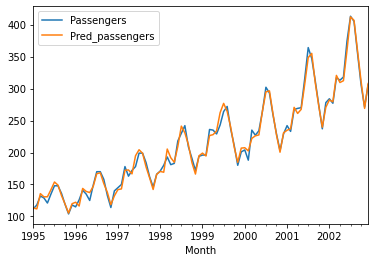

In [28]:
airlines_df.plot()